In [48]:
#import all the libraries to use for plotting and perform the calculations
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#so the plot comes in one separate line

In [49]:
# to get the current working directory
import os
os.getcwd()
print(os.listdir())

['.ipynb_checkpoints', 'Bcancer - Assignment two.ipynb', 'Bcancer.csv', 'DataFrames 1.ipynb', 'DataFrames 2.ipynb', 'DataFrames 3.ipynb', 'EMP Dataset.ipynb', 'emp.csv', 'gender_submission_titanic.csv', 'Groupby.ipynb', 'Input and Output.ipynb', 'iris.data', 'Merging, Joining and Concatenating.ipynb', 'MultiIndex.ipynb', 'nba.csv', 'Options and Settings.ipynb', 'Panels.ipynb', 'Rhythm for food.ipynb', 'Rythm_for_Food.csv', 'Series.ipynb', 'test.png', 'Titanic 2.ipynb', 'Titanic.ipynb', 'titanic_test.csv', 'titanic_Train.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Visualization.ipynb', 'Working with Dates and Times.ipynb', 'Working with Text Data.ipynb']


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
#let us import the data

In [52]:
train = pd.read_csv("titanic_Train.csv")
test = pd.read_csv("titanic_test.csv")


In [53]:
#dimension of the data

In [54]:
display(train.shape, test.shape)

(891, 12)

(418, 11)

In [55]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [57]:
display(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
display(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
train_id = train["PassengerId"]
test_id = test["PassengerId"]
#this column has no association or we do not depend on it for now hence we save it and drop it.

In [60]:
train = train.drop('PassengerId', axis=1)


In [61]:
test = test.drop('PassengerId',axis = 1 )


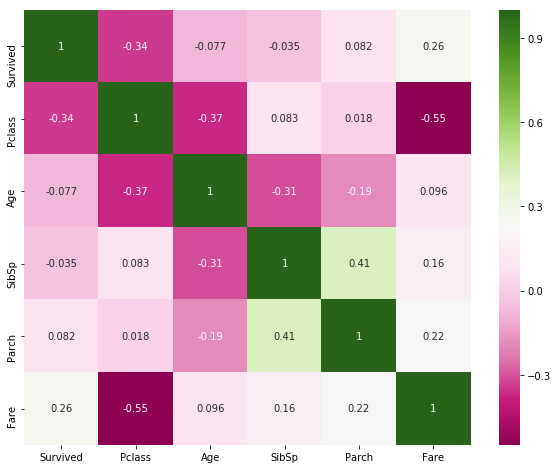

In [62]:
cor_train= train.corr()
plt.subplots(figsize =(10,8))
sns.heatmap(cor_train,vmax = 1,cmap = "PiYG", annot=True)

,Sex,Survived
0,female,0.742038
1,male,0.188908


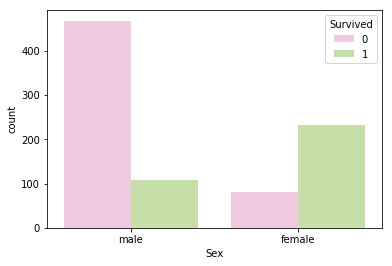

In [63]:
#sex factor - it is categorical
#cannot pass values for both x and y
sns.countplot(x='Sex', hue='Survived', data=train, palette='PiYG')
train[['Sex','Survived']].groupby(["Sex"], as_index= False).mean().sort_values(by = "Survived" ,ascending = False)

#3/4th of the women survived


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


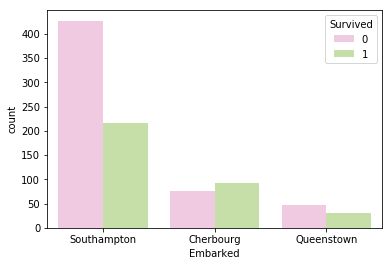

In [64]:
#Embarked
sns.countplot(x="Embarked", hue = "Survived",data = train, palette="PiYG")
plt.xticks([0,1,2], ["Southampton", "Cherbourg", "Queenstown"])
#xticks does would assign these three categories,to be compared
train[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by = "Survived", ascending =False)

#max people embarked where from Southampton and people who survived embarked from Cherbourg

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


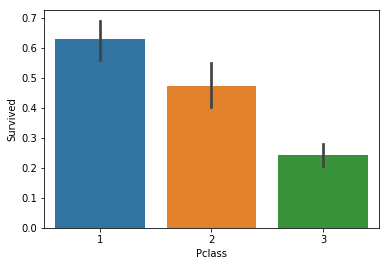

In [65]:
sns.barplot(train.Pclass,train.Survived)
train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending =False)
#max people survived were from class 1, least survived from class 3

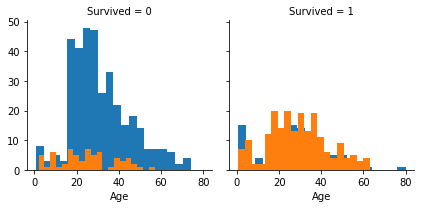

In [66]:
sns.FacetGrid(train,col = "Survived", hue = "Sex").map(plt.hist,'Age',bins=20)


In [67]:
# https://www.kaggle.com/callmeriver/feature-engineering-and-ml-for-beginners

In [68]:
#strangely people with age 0 sruvived, which is strange but these are the people whose age is missing. People with age group 20-40 
#survived and the men with age group 30-35 perished.

In [69]:
ntrain = train.shape[0]
ntest = test.shape[0]
a_train = train.Survived.values

In [70]:
Combined_data = pd.concat((train,test)).reset_index(drop = True)

In [71]:
display("The total data size is: {}".format(Combined_data.shape))

'The total data size is: (1309, 11)'

In [72]:
#let us now discover, how much of the data is lost.


In [73]:
missing_data = Combined_data.isnull().sum().sort_values(ascending = False)

In [74]:
percentage_of_missingData = ((Combined_data.isnull().sum()/Combined_data.isnull().count())*100).sort_values(ascending = False)

In [75]:
percentage_of_missingData

Cabin       77.463713
Survived    31.932773
Age         20.091673
Embarked     0.152788
Fare         0.076394
Ticket       0.000000
SibSp        0.000000
Sex          0.000000
Pclass       0.000000
Parch        0.000000
Name         0.000000
dtype: float64

In [76]:
 total_missing_data = pd.concat([missing_data,percentage_of_missingData], axis=1,keys=['Total','Percentage'])

In [77]:
missing_data

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
Ticket         0
SibSp          0
Sex            0
Pclass         0
Parch          0
Name           0
dtype: int64

In [78]:
total_missing_data

,Total,Percentage
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Parch,0,0.000000


In [79]:
#more than 3/4th of the data in the cabin column is missing

In [80]:
 Combined_data["hasCabin"] = Combined_data["Cabin"].notnull().astype("int")

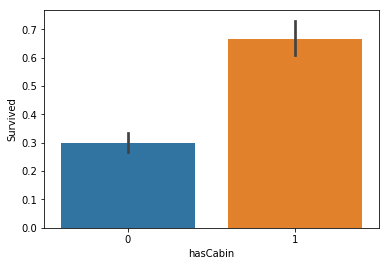

In [81]:
Combined_data["hasCabin"]
sns.barplot(x= "hasCabin",y= "Survived",data = Combined_data)

In [82]:
 Combined_data = Combined_data.drop('Cabin',axis=1)
Combined_data = Combined_data.drop("Ticket", axis= 1)
#here using dropna was giving me an error

In [83]:
# https://www.kaggle.com/callmeriver/feature-engineering-and-ml-for-beginners/notebook

In [84]:
Combined_data.head(2)

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,hasCabin
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,1


In [85]:
Combined_data["Embarked"].isnull().sum()
#Embarked has two null values here
#the best judgement here is the assign it the value of Southhampton as majority of them boarded from there.

2

In [86]:
Combined_data = Combined_data.fillna({"Embarked": "S"})


In [87]:
Combined_data.head(7)

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,hasCabin
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,0
5,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,0
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,1


In [131]:
 Combined_data["Title"] = Combined_data["Name"].str.extract('([A-Za-z]+)\.', expand=False)


In [132]:
Combined_data.head()
#learn about str.extract

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title
0,22.0,1,1.0,"Braund, Mr. Owen Harris",0,3,0,1,0.0,0,Mr
1,38.0,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,1,Mrs
2,26.0,1,1.0,"Heikkinen, Miss. Laina",0,3,1,0,1.0,0,Miss
3,35.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,1,Mrs
4,35.0,1,1.0,"Allen, Mr. William Henry",0,3,0,0,0.0,0,Mr


In [133]:
#next is age

In [134]:
pd.crosstab(Combined_data["Title"],Combined_data["Sex"])

Sex,0,1
Title,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [135]:
#combine a lot of these and make them together as they are not too important

In [136]:
for i,row in Combined_data.iterrows():
    x = Combined_data.loc[i].at['Title']
    if x in ['Capt','Col','Don' ,'Dr' ,'Major','Rev' ,'Sir']:
        Combined_data.at[i,'Title']= 'Mr'
    if x in ['Mlle','Ms' ,'Dona' ,'Lady','Mme']:
        Combined_data.at[i,'Title']= 'Miss'
    if x in ['Countess','Jonkheer']:
        Combined_data.at[i,'Title'] = 'other'
        
pd.crosstab(Combined_data['Title'], Combined_data['Sex'])


Sex,0,1
Title,,
Master,61,0
Miss,0,267
Mr,781,1
Mrs,0,197
other,1,1


In [137]:
#Mr is female, that is a doctor who is a female


In [138]:
Females = Combined_data[Combined_data["Sex"]=="female"]

In [139]:
Dr_female = Females[Females["Title"]=="Mr"]

In [140]:
Combined_data.at[796,"Title"] = "Mrs"
#index is here 796

In [141]:
pd.crosstab(Combined_data["Title"],Combined_data["Sex"])

Sex,0,1
Title,,
Master,61,0
Miss,0,267
Mr,781,0
Mrs,0,198
other,1,1


In [142]:
# Convert the Categorical Variable
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "other": 5}
for i,row in Combined_data.iterrows():
    if Combined_data.loc[i].at['Title'] in title_mapping:
        Combined_data.at[i,'Title']= title_mapping[Combined_data.loc[i].at['Title']]


In [143]:
Combined_data.head(3)

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title
0,22.0,1,1.0,"Braund, Mr. Owen Harris",0,3,0,1,0.0,0,1
1,38.0,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,1,3
2,26.0,1,1.0,"Heikkinen, Miss. Laina",0,3,1,0,1.0,0,2


In [144]:
#The missing age records to be filled by the mean values based on the titles they belong to
Mr_age = Combined_data[Combined_data["Title"]==1].Age.mean()
Miss_age = Combined_data[Combined_data["Title"]==2].Age.mean()
Mrs_age = Combined_data[Combined_data["Title"]==3].Age.mean()
Master_age = Combined_data[Combined_data["Title"]==4].Age.mean()
Other_age = Combined_data[Combined_data["Title"]==5].Age.mean()
print(Mr_age, Miss_age, Mrs_age, Master_age,Other_age)

Group_age_mapping = {1:Mr_age,2:Miss_age,3:Mrs_age,4:Master_age,5:Other_age}
for i,row in Combined_data.iterrows():
    if np.isnan(Combined_data.loc[i].at["Age"]):
        Combined_data.at[i,"Age"] = Group_age_mapping[Combined_data.loc[i].at["Title"]]
        

32.77566225165574 22.035138888888866 37.06432748538011 5.482641509433961 35.5


In [145]:
#Let us drop the name column as we do not need them

In [178]:
Combined_data.drop('Name', axis = 1, inplace = True)

In [179]:
#Converting sex and embarked to numeric values

In [180]:
Combined_data.head(2)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title
0,22.0,1,1.0,0,3,0,1,0.0,0,1
1,38.0,2,1.0,0,1,1,1,1.0,1,3


In [181]:
#Coverting the 'Sex' and 'Embarked' features to numeric:
sex_mapping = {"male": 0, "female": 1}
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

In [182]:
for i,row in Combined_data.iterrows():
    if Combined_data.loc[i].at['Sex'] in sex_mapping:
        Combined_data.at[i,'Sex']= sex_mapping[Combined_data.loc[i].at['Sex']]
    if Combined_data.loc[i].at['Embarked'] in embarked_mapping:
        Combined_data.at[i,'Embarked']= embarked_mapping[Combined_data.loc[i].at['Embarked']]
Combined_data.head(2)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title
0,22.0,1,1.0,0,3,0,1,0.0,0,1
1,38.0,2,1.0,0,1,1,1,1.0,1,3


In [183]:
#now for the fare, we can complete the missing value
mode = Combined_data["Fare"].mode()
mode

0    1.0
dtype: float64

In [213]:
# Combined_data['Fare'].fillna(mode[0], inplace=True)
Combined_data.drop('Survived',axis=1, inplace=True) # drop survived column

missingData = Combined_data.isnull().sum().sort_values(ascending=False)
percentageMissing = ((Combined_data.isnull().sum()/Combined_data.isnull().count())*100).sort_values(ascending=False)
totalMissing = pd.concat([missingData, percentageMissing], axis=1, keys=['Total','Percentage'])
totalMissing

,Total,Percentage
Fare,1,0.076394
Title,0,0.000000
hasCabin,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Parch,0,0.000000
Embarked,0,0.000000
Age,0,0.000000


In [185]:
Combined_data[Combined_data["Age"].isnull()]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title


In [186]:
#Yayyyyy No more missing Data
Combined_data.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,hasCabin,Title
0,22.0,1,1.0,0,3,0,1,0.0,0,1
1,38.0,2,1.0,0,1,1,1,1.0,1,3
2,26.0,1,1.0,0,3,1,0,1.0,0,2


In [191]:
# Hmmm, everything seems in order.

# We just have this 'Fare' feature that looks like it has potential to guide us with our predictions.

# Let catogrize the 'Fare' feature as well. we'll do that by dividing it to 4 caregories.
# FareBand = pd.qcut(Combined_data["Fare"],4)

In [192]:
FareBand.nunique()

4

In [193]:
FareBand.unique()

[(-0.001, 7.896], (31.275, 512.329], (7.896, 14.454], (14.454, 31.275], NaN]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [214]:
#okay, let's adjust the 'Fare' feature:
for i,row in Combined_data.iterrows():
    x=Combined_data.loc[i].at['Fare']
    if (x > -0.001 and x <=7.896):
        Combined_data.at[i,'Fare'] = 1
    if (x > 7.896 and x <=14.454):
        Combined_data.at[i,'Fare'] = 2
    if (x > 140454 and x <=31.275):
        Combined_data.at[i,'Fare'] = 3
    if (x > 31.275 and x <=512.329):
        Combined_data.at[i,'Fare'] = 4
        
Combined_data.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,hasCabin,Title
0,22.000000,1,1.0000,0,3,0,1,0,1
1,38.000000,2,1.0000,0,1,1,1,1,3
2,26.000000,1,1.0000,0,3,1,0,0,2
3,35.000000,1,1.0000,0,1,1,1,1,3
4,35.000000,1,1.0000,0,3,0,0,0,1
5,32.775662,3,1.0000,0,3,0,0,0,1
6,54.000000,1,1.0000,0,1,0,0,1,1
7,2.000000,1,21.0750,1,3,0,3,0,4
8,27.000000,1,1.0000,2,3,1,0,0,3
9,14.000000,2,30.0708,0,2,1,1,0,3


In [215]:
target = train['Survived']
trainData = Combined_data[0:ntrain]
testData = Combined_data[ntrain:]
display(target.shape, trainData.shape, testData.shape)

(891,)

(891, 9)

(418, 9)

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(trainData, target, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 9), (712,), (179, 9), (179,))

In [217]:
#Best model Selection

In [218]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test), 2)
print(acc_gaussian)

0.84


In [219]:
#So the gausian is coming 100% here.

In [220]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test), 2)
print(acc_logreg)


0.84


In [221]:
#Support Vector Machines
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test), 2)
print(acc_svc)

0.78


In [222]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)
y_pred = DecisionTreeClassifier.predict(X_test)
acc_DecisionTreeClassifier = round(accuracy_score(y_pred,y_test),2)
print(acc_DecisionTreeClassifier)

0.8


In [223]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) , 2)
print(acc_randomforest)

0.82


In [224]:
 #Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) , 2)
print(acc_gbk)

0.84


In [231]:
#KNN Feature scaling
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


In [235]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=8)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  
accuracy = round(accuracy_score(y_pred, y_test),2)
print(accuracy)

0.83


In [237]:
# # Perceptron algorithm
# from sklearn.linear_model import perceptron
# Perceptron = perceptron()


In [229]:
output = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': target })
output.to_csv('submission.csv', index=False)


In [230]:
output

,PassengerId,Survived
0,892.0,0
1,893.0,1
2,894.0,1
3,895.0,1
4,896.0,0
5,897.0,0
6,898.0,0
7,899.0,0
8,900.0,1
9,901.0,1
